# Linear Transformations
Transformations map one vector space to another. 

A linear transformation:
* Keeps parallel lines parallel
* Equal space between parallel lines
* Origin remains at the origin

# Rotation

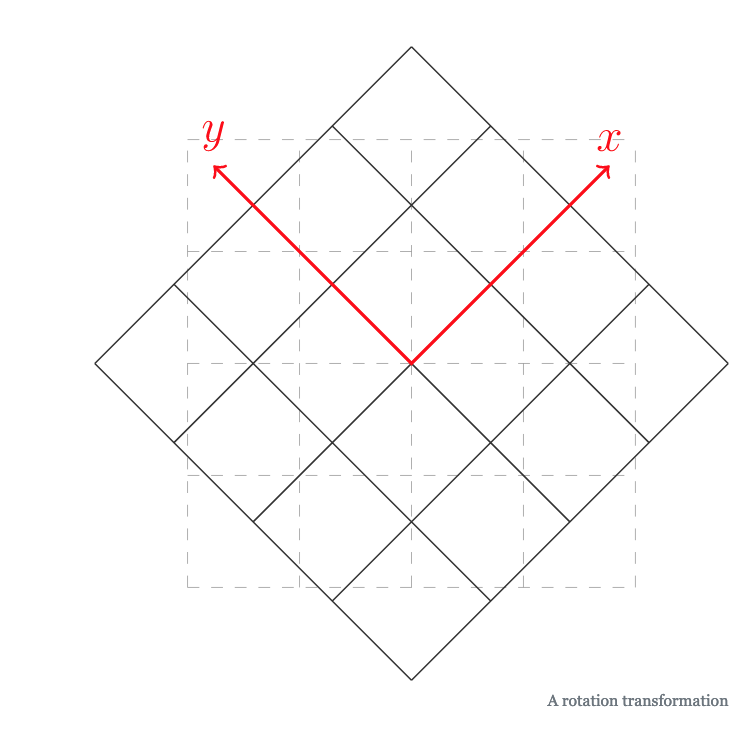

# Scaling
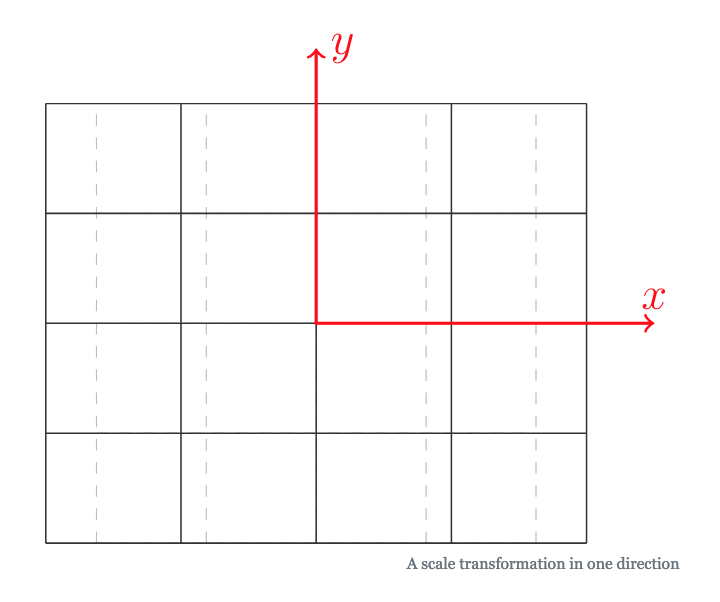

# Sheer

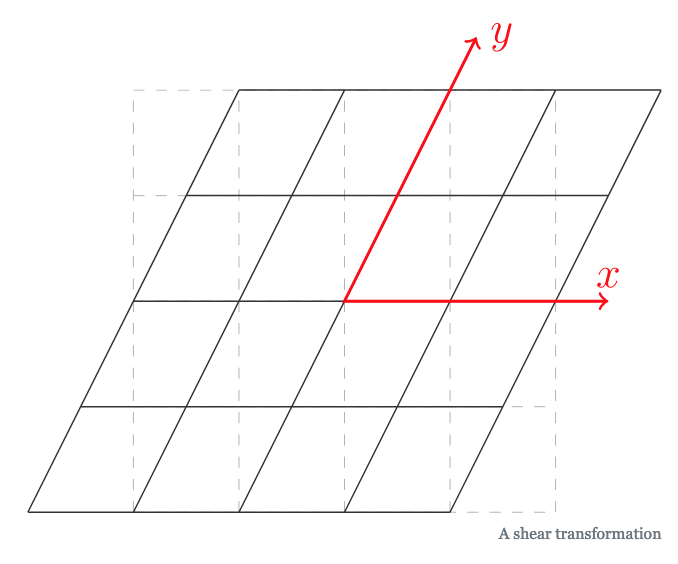



A matrix acts as a transformation map, e.g. how the transformation is done:

(<span style="color: red;">transformed vector</span>) = (<span style="color: green;">transformation matrix</span>)(<span style="color: blue;">input vector</span>)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
def transform(A, fig_name):
    nxp=20
    nxq=20
    p = np.linspace(-1.0,1.0,nxp)
    q = np.linspace(-1.0,1.0,nxq)
    m=np.meshgrid(p,q)        # Create grid for plotting
    xx=m[0]
    yy=m[1]

    fig = plt.figure(fig_name)
    plt.suptitle(fig_name)
    plt.axis('equal');
    #plt.show()

    # Apply transform to every point in grid.
    for i in range(nxp):
          for j in range(nxq):
            x = np.array([xx[i][j], yy[i][j]])
            y = np.matmul(A,x)
            plt.plot(x[0], x[1], '.b', y[0], y[1], '.r')
            #print(x[0],x[1])        
    #fig = plt.figure(fig_name)
    #plt.suptitle(fig_name)
    #plt.axis('equal');
    plt.show()


## Rotation Example

Let's look at a 90 degree counter clockwise rotation:
Rotated unit vectors $\hat{i}'$ and $\hat{j}'$ are:

$\hat{i}' = 
\begin{pmatrix}
0\\
1
\end{pmatrix}$ ,
$\hat{j}' = 
\begin{pmatrix}
-1\\
0
\end{pmatrix}$

Transformation would then be:
$\begin{pmatrix}
x'\\
y'
\end{pmatrix} = 
\begin{pmatrix}
0 & -1\\
1 & 0
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}$


In [ ]:
#rotBase = matrix of rotated unit vectors
rotBase = np.array([[0,-1],[1,0]])
print(rotBase)

In [ ]:
transform(rotBase,'rotBase')

We can generalize our results to define a **rotation matrix**

In [ ]:
#define an angle in radians
th = 45 * (np.pi/180)
rotMatrix = np.array([ [np.cos(th),-np.sin(th)], [np.sin(th),np.cos(th)] ])

print(rotMatrix)
#transform(rotMatrix,'rotMatrix')

In [ ]:
transform(rotMatrix,'rotMatrix')

## Sheer Example
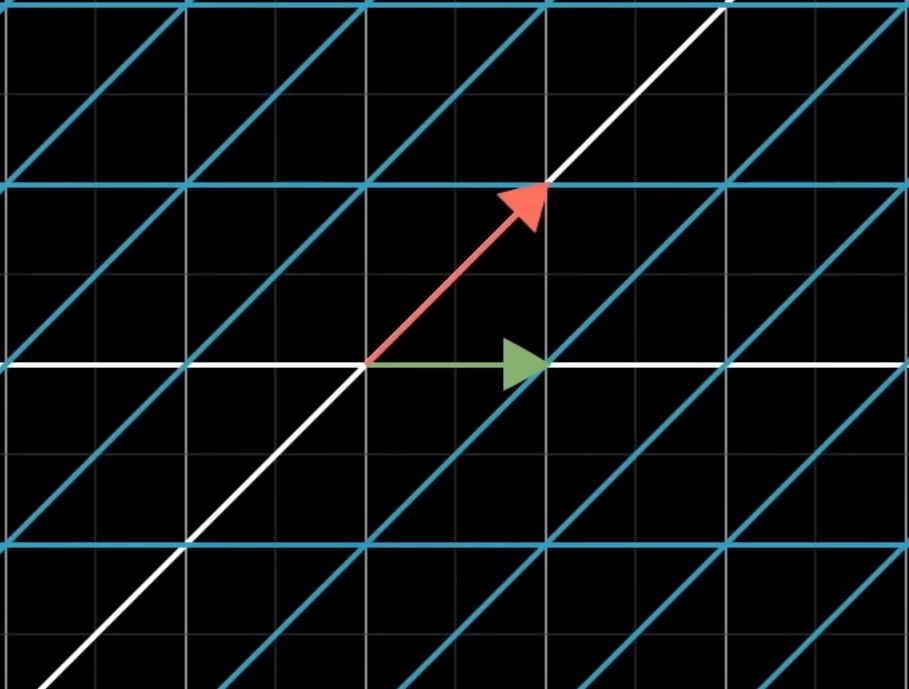


In [ ]:
sheerMatrix = np.array([[1,1],[0,1]])
print(sheerMatrix)
#transform(sheerMatrix,'sheerMatrix')

In [ ]:
transform(sheerMatrix,'sheerMatrix')


More about transformations and what non-linear transformations look like are discussed [here](https://mathigon.org/course/linear-algebra/linear-transformations) with embedded video.


# Linear Algebra Review

## Matrices

### Matricies

A matrix in general can by any dimension of $m$ rows and $n$ columns ($m \times n$):

$\bf{A} =
\begin{pmatrix}
\bf{a_{11}} & a_{12} & . & . & . & a_{1n}\\
a_{21} & \bf{a_{22}} & . & . & . & a_{2n}\\
 .     & .      & \bf{.} &   &   & .\\
 .     & .      &   & \bf{.} &   & .\\
 .     & .      &   &   & \bf{.} & .\\
a_{m1} & a_{m2} & . & . & . & \bf{a_{mn}}
\end{pmatrix}$ 



A matrix with with rows = columns ($n \times n$) is called a **square matrix**. 

A $3 \times 3$ matrix $\bf{A}$:

$\bf{A} =
\begin{pmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{pmatrix}$ 

A matrix with one row can be thought of as a **row vector**: 

$\vec v_{row} =
\begin{pmatrix}
1 & 0 & 0
\end{pmatrix}$ 

A matrix with one column can be thought of as a **column vector**

$\vec v_{col} = 
\begin{pmatrix}
1\\
2\\
3
\end{pmatrix}$ 

In [ ]:
A = np.array([ [1,2,3],[4,5,6],[7,8,9] ])
v_row = np.array([1,0,0])
v_col = np.array([ [1],[0],[0] ])

print("A:\n",A)
print("\n")
print("v_row:\n", v_row)
print("\n")
print("v_col:\n", v_col)

## Matrix Operations


### Addition

Matricies must have the same dimensions to be added (e.g. same number of rows and columns). To add two $m$-by-$n$ matrices $\bf{A}$ and $\bf{B}$:
- Add entrywise: $(\bf{A}+\bf{B})_{ij} = \bf{A}_{ij} + \bf{B}_{ij}$. Similar for subtraction.

$\bf{A} + \bf{B} =
\begin{pmatrix}
1 & 2\\
4 & 5\\
7 & 8
\end{pmatrix} + 
\begin{pmatrix}
1 & 0\\
0 & 1\\
0 & 0
\end{pmatrix} = 
\begin{pmatrix}
1+1 & 2+0\\
4+0 & 5+1\\
7+0 & 8+0
\end{pmatrix} = 
\begin{pmatrix}
2 & 2\\
4 & 6\\
7 & 8
\end{pmatrix}$

$\bf{A} - \bf{B} =
\begin{pmatrix}
0 & 2\\
4 & 4\\
7 & 8
\end{pmatrix}$

In [ ]:
A = np.array([[1,2],[4,5],[7,8]])
B = np.array([[1,0],[0,1],[0,0]])

print("A:\n", A)
print("\nB:\n", B)

AB_add = A + B
print("\nA+B:\n",AB_add)

AB_sub = A - B
print("\nA+B:\n",AB_sub)

### Scalar Multiplication

Multiplying a matrix $\bf{A}$ by a scalar $c$ is computed by mulitplying every element in $\bf{A}$ by the scalar $c$:
- $(c\bf{A})_{ij} = c\cdot \bf{A}_{ij}$

$2 \cdot\bf{A} =
2\cdot\begin{pmatrix}
1 & 2\\
4 & 5\\
7 & 8
\end{pmatrix} =
\begin{pmatrix}
2\cdot 1 & 2\cdot 2\\
2\cdot 4 & 2\cdot 5\\
2\cdot 7 & 2\cdot 8
\end{pmatrix} = 
\begin{pmatrix}
2 & 4\\
8 & 10\\
14 & 16
\end{pmatrix}$

In [ ]:
A = np.array([[1,2],[4,5],[7,8]])
c = 2.0

cA = c*A
print("cA:\n",cA)

### Transpose

The transpose of an $m$-by-$n$ $\bf{A}$ is the $n$-by-$m$ matrix $\bf{A^T}$ formed by turning rows into columns and vice-versa.

$(\bf{A^T})_{ij} = \bf{A}_{ji}$

$\begin{pmatrix}
1 & 2\\
3 & 4\\
5 & 6
\end{pmatrix}^T =
\begin{pmatrix}
1 & 3 & 5\\
2 & 4 & 6
\end{pmatrix}$


In [ ]:
A = np.array([[1,2],[3,4],[5,6]])
A_T = A.T
#A.T is short hand for A.transpose()
print("A_T:\n",A_T)

###  Matrix Multiplication

The multiplication of two matrices $\bf{A}$ which has dimensions $m$-by-$n$ and $\bf{B}$ which is a $n$-by-$p$ matrix leads to a product matrix $\bf{C}$ which has dimentsions of $m$-by-$p$.

Consider a 3-by-2 matrix $\bf{A}$ and 2-by-4 matrix $\bf{B}$:

$\bf{A} = \begin{pmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}\\
a_{31} & a_{32}
\end{pmatrix},\;\;
\bf{B} = \begin{pmatrix}
b_{11} & b_{12} & b_{13} & b_{14}\\
b_{21} & b_{22} & b_{23} & b_{24}\\
\end{pmatrix}$

Then the matrix product $AB$ is defined as:

$\bf{AB} =\begin{pmatrix}
(a_{11}\cdot b_{11} + a_{12}\cdot b_{21}) & (a_{11}\cdot b_{12} + a_{12}\cdot b_{22}) & (a_{11}\cdot b_{13} + a_{12}\cdot b_{23}) & (a_{11}\cdot b_{14} + a_{12}\cdot b_{24})\\
(a_{21}\cdot b_{11} + a_{22}\cdot b_{21}) & (a_{21}\cdot b_{12} + a_{22}\cdot b_{22}) & (a_{21}\cdot b_{13} + a_{22}\cdot b_{23}) & (a_{21}\cdot b_{14} + a_{22}\cdot b_{24})\\
(a_{31}\cdot b_{11} + a_{32}\cdot b_{21}) & (a_{31}\cdot b_{12} + a_{32}\cdot b_{22}) & (a_{31}\cdot b_{13} + a_{32}\cdot b_{23}) & (a_{31}\cdot b_{14} + a_{32}\cdot b_{24})
\end{pmatrix}$


$\bf{A} = \begin{pmatrix}
1 & 2\\
2 & 1\\
0 & 3
\end{pmatrix},\;\;
\bf{B} = \begin{pmatrix}
1 & 2 & 0 & 4\\
0 & 2 & 3 & 1\\
\end{pmatrix}$

Then the matrix product $AB$ is 

$\bf{AB} =\begin{pmatrix}
1 & 6 & 6 & 6\\
2 & 6 & 3 & 9\\
0 & 6 & 9 & 3
\end{pmatrix}$

Note that $\bf{A \cdot B}$ is **not** the same as $\bf{B \cdot A}$. In the case above $\bf{A\cdot B}$ results in a 3-by-4 matrix. 

Can we do $\bf{B\cdot A}$ using the example matrices above? 

In [ ]:
A = np.array([ [1,2],[2,1],[0,3] ])
B = np.array([ [1,2,0,4],[0,2,3,1] ])

AB = np.matmul(A,B)
print("AB = \n",AB)

BA = np.matmul(B,A)
print("BA = \n",BA)



### Identity Matrix

The identity matrix is a $n \times n$ matrix whose diagonal terms are $1$'s and off diagonal terms are $0$'s. An $n \times n$ identity matrix is represented as $I_n$. A $\;3 \times 3$ identity matrix, $I_3 = 
\begin{pmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{pmatrix}$ 

In [ ]:
I_3 = np.eye(3)
print("I_3 = \n", I_3)
print("diagonal elements of I_3: ", np.diag(I_3))

Multiplication with the identity matrix leaves the original matrix unchanged:

$\bf{A\cdot I_n} = \bf{I_m\cdot A}$, for any m-by-n matrix $\bf{A}$ 

In [ ]:
A = np.array([[1,2],[3,4],[5,6]])
I_2 = np.eye(2)
I_3 = np.eye(3)

print('A:\n',A)

AI2 = np.matmul(A,I_2)
print("\nAI2:\n",AI2)

I3A = np.matmul(I_3,A)
print("\nIA:\n",I3A)

## Determinate

The determinate of a square matrix $\bf{A}$ can be represented $det(\bf{A})$ or $|\bf{A}|$, and contains specfic properties about the matrix.

- Determins if the matrix is invertable 
- Geometricaly relats to areas/volumes
- Transformations

A 2-by-2 matrix $\bf{A}$ has a determinate:
$\begin{vmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{vmatrix} = a_{11}a_{22} - a_{12}a_{21}$

Example:
$\begin{vmatrix}
2 & 1\\
1 & 3
\end{vmatrix} = 2\cdot 3 - 1\cdot 1 = 6 - 1 = 5$


In [ ]:
A = np.array([[2,1],[1,3]])
detA = np.linalg.det(A)
print(detA)

To compute the determinate of larger matrices you can break it into a series of 2-by-2 determinates. 

Example:

$\begin{vmatrix}
1 & 2 & 1\\
2 & 1 & 3\\
3 & 0 & 1
\end{vmatrix} = 
1\cdot \begin{vmatrix}
1 & 3\\
0 & 1\\
\end{vmatrix} -
2\cdot \begin{vmatrix}
2 & 3\\
3 & 1\\
\end{vmatrix} +
1\cdot \begin{vmatrix}
2 & 1\\
3 & 0\\
\end{vmatrix}
= 
1\cdot (1\cdot 1 - 3\cdot 0) - 2\cdot (2\cdot 1 - 3\cdot 3) + 1\cdot (2\cdot 0 - 1\cdot 3)
= 1 - (-14) + (-3)
= 12
$

In [ ]:
A = np.array([[1,2,1],[2,1,3],[3,0,1]])
detA = np.linalg.det(A)
print("A:\n",A)
print("\ndetA:\n",detA)

### The Cross Product

The formula for the cross product of two vectors, $\vec{A} = a_x \hat{i} + a_y \hat{j} + a_z \hat{k}$ and $\vec{B} = b_x \hat{i} + b_y \hat{j} + b_z \hat{k}$ is:

$\vec{A} \times \vec{B} = (a_y b_z - a_z b_y)\hat{i} - (a_x b_z - a_z b_x)\hat{j} + (a_x b_y - a_y b_x)\hat{k}$

The determinate can be used to reproduce this formula:

$\begin{vmatrix}
\hat{i} & \hat{j} & \hat{k}\\
a_x     &  a_y    & a_z\\ 
b_x     &  b_y    & b_z
\end{vmatrix} = 
\hat{i}(a_y b_z - a_z b_y) - \hat{j}(a_x b_z - a_z b_x) + \hat{k}(a_x b_y - a_y b_x)
$